In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
from dynnow.plot import (ax_histo_projection_eigenvec, ax_eigenval_order, ax_eigenval_lead_time,
ax_spectral_field, axs_spectral_vec, ax_cosine_error_projection, axs_FSS)
from dynnow.analysis import Analysis

Pysteps configuration file found at: /home/martinbo/fileserver/home/miniforge3/envs/lyapunovml/lib/python3.12/site-packages/pysteps/pystepsrc



In [4]:
cmap = cmc.batlow
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", cmc.batlowS.colors)

In [5]:
res_conv_LDCast = Analysis.from_netcdf('../LDCast/data/results_convective_events1.nc')
res_strat_LDCast = Analysis.from_netcdf('../LDCast/data/results_stratiform_events1.nc')

In [6]:
res_conv_STEPS = Analysis.from_netcdf('../STEPS/data/results_convective_events1.nc')
res_strat_STEPS = Analysis.from_netcdf('../STEPS/data/results_stratiform_events1.nc')

# Comparison of uncertainty sizes

In [7]:
# lead time index for which to plot
lt = 2

In [8]:
histos_conv_LDCast = res_conv_LDCast.original.histos_projection_eigenvec.isel(lead_time = lt).mean(dim = 'central_time')
histos_strat_LDCast = res_strat_LDCast.original.histos_projection_eigenvec.isel(lead_time = lt).mean(dim = 'central_time')
histos_conv_STEPS = res_conv_STEPS.original.histos_projection_eigenvec.isel(lead_time = lt).mean(dim = 'central_time')
histos_strat_STEPS = res_strat_STEPS.original.histos_projection_eigenvec.isel(lead_time = lt).mean(dim = 'central_time')

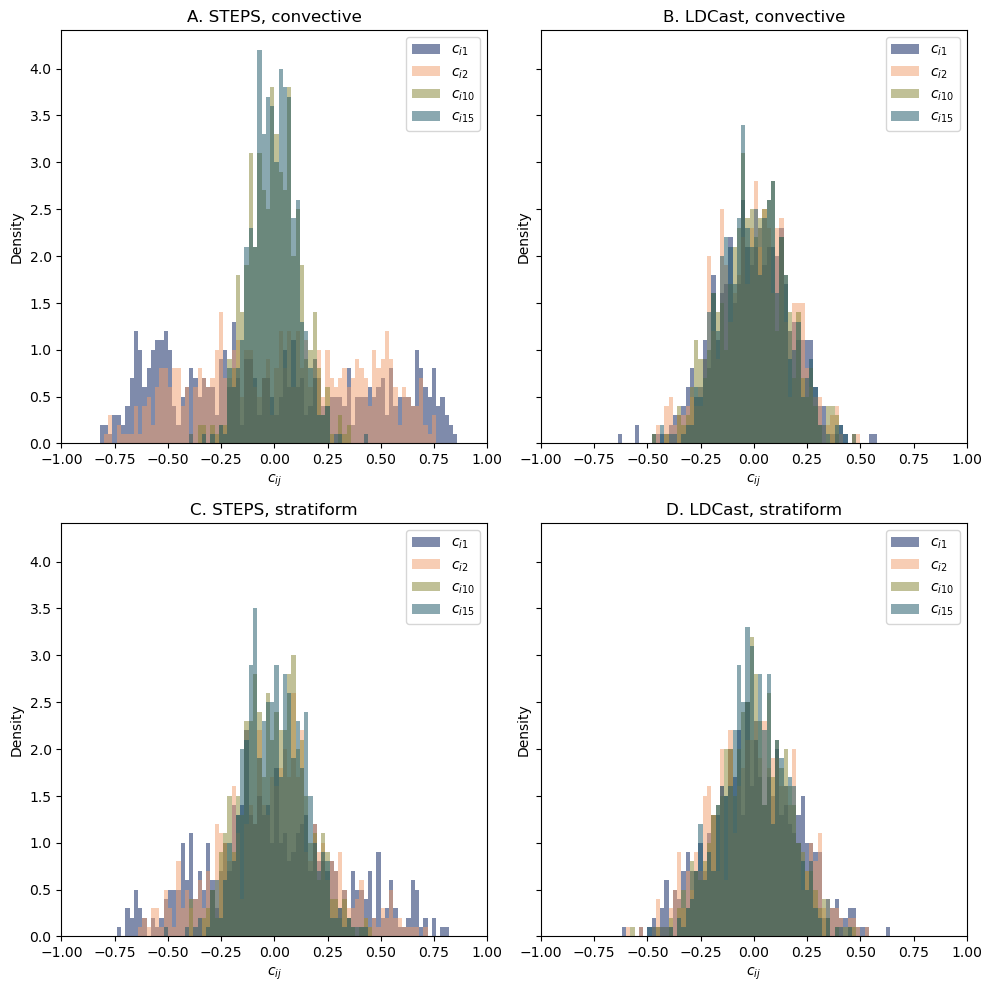

In [9]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey = True)

c = ['C0', 'C4', 'C2', 'C9']

for n, m in enumerate([0, 1, 9, 14]):
    ax_histo_projection_eigenvec(axs[0, 0], histos_conv_STEPS[m], title = 'A. STEPS, convective', alpha = 0.5, color = c[n], label = f'$c_{{i{m+1}}}$')
    ax_histo_projection_eigenvec(axs[0, 1], histos_conv_LDCast[m], title = 'B. LDCast, convective', alpha = 0.5, color = c[n], label = f'$c_{{i{m+1}}}$')
    ax_histo_projection_eigenvec(axs[1, 0], histos_strat_STEPS[m], title = 'C. STEPS, stratiform', alpha = 0.5, color = c[n], label = f'$c_{{i{m+1}}}$')
    ax_histo_projection_eigenvec(axs[1, 1], histos_strat_LDCast[m], title = 'D. LDCast, stratiform', alpha = 0.5, color = c[n], label = f'$c_{{i{m+1}}}$')        

for ax in axs.flatten():
    ax.legend()
    
fig.tight_layout(pad=1.0)
plt.savefig('images/projection_on_eigenvec.png', bbox_inches='tight')

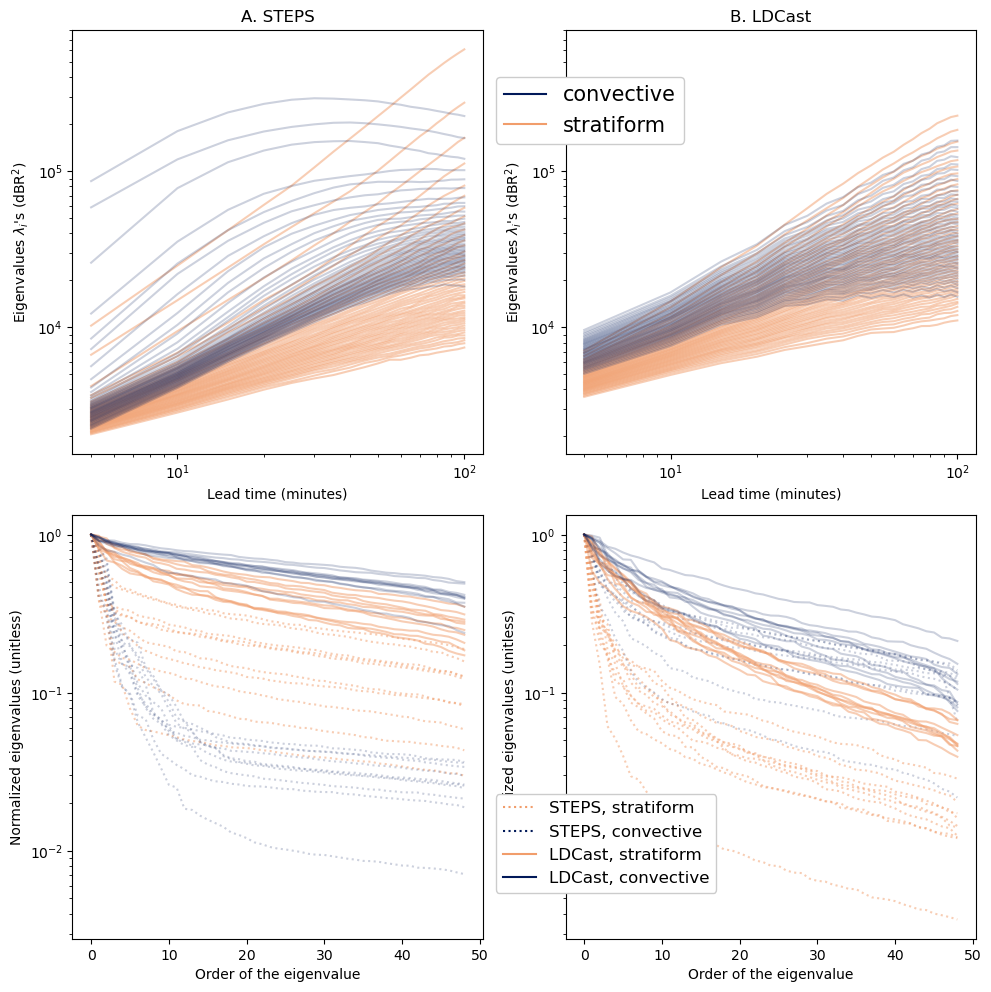

In [26]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

alpha_strat = 0.5
alpha_conv = 0.2

######################### Plot eigenvalues against lead time
ax_eigenval_lead_time(axs[0, 0], res_strat_STEPS.original.eigenval.mean(dim = 'central_time'), 'A. STEPS', c = 'C4', alpha = alpha_strat)
ax_eigenval_lead_time(axs[0, 0], res_conv_STEPS.original.eigenval.mean(dim = 'central_time'), 'A. STEPS', c = 'C0', alpha = alpha_conv)

axs[0, 1].sharey(axs[0, 0])
ax_eigenval_lead_time(axs[0, 1], res_strat_LDCast.original.eigenval.mean(dim = 'central_time'), 'B. LDCast', c = 'C4', alpha = alpha_strat)
ax_eigenval_lead_time(axs[0, 1], res_conv_LDCast.original.eigenval.mean(dim = 'central_time'), 'B. LDCast', c = 'C0', alpha = alpha_conv)

axs[0, 0].plot([], [], c = 'C0', label = 'convective')
axs[0, 0].plot([], [], c = 'C4', label = 'stratiform')
fig.legend(loc = (0.5, 0.855), framealpha = 1, fontsize = 15)

################################# Plot eigenvalues against order for one lead time

### lead time 15 minutes
lt = np.argwhere(res_strat_STEPS.lead_time.data == np.timedelta64(15, 'm')).squeeze()

ax_eigenval_order(axs[1, 0], res_strat_STEPS.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 15 minutes', c = 'C4', alpha = alpha_strat, linestyle = 'dotted')
ax_eigenval_order(axs[1, 0], res_conv_STEPS.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 15 minutes', c = 'C0', alpha = alpha_conv, linestyle = 'dotted')
ax_eigenval_order(axs[1, 0], res_strat_LDCast.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 15 minutes', c = 'C4', alpha = alpha_strat)
ax_eigenval_order(axs[1, 0], res_conv_LDCast.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 15 minutes', c = 'C0', alpha = alpha_conv)

### lead time 90 minutes
axs[1, 1].sharey(axs[1, 0])
lt = np.argwhere(res_strat_STEPS.lead_time.data == np.timedelta64(90, 'm')).squeeze()

ax_eigenval_order(axs[1, 1], res_strat_STEPS.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 90 minutes', c = 'C4', alpha = alpha_strat, linestyle = 'dotted')
ax_eigenval_order(axs[1, 1], res_conv_STEPS.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 90 minutes', c = 'C0', alpha = alpha_conv, linestyle = 'dotted')
ax_eigenval_order(axs[1, 1], res_strat_LDCast.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 90 minutes', c = 'C4', alpha = alpha_strat)
ax_eigenval_order(axs[1, 1], res_conv_LDCast.original.eigenval.isel(lead_time = lt), title = 'C. Lead time = 90 minutes', c = 'C0', alpha = alpha_conv)

# legend
line1 = axs[1, 1].plot([], [], c = 'C4', linestyle = 'dotted')
line2 = axs[1, 1].plot([], [], c = 'C0', linestyle = 'dotted')
line3 = axs[1, 1].plot([], [], c = 'C4')
line4 = axs[1, 1].plot([], [], c = 'C0')

leg = fig.legend([line1[0], line2[0], line3[0], line4[0]],
           ['STEPS, stratiform', 'STEPS, convective', 'LDCast, stratiform', 'LDCast, convective'],
           loc = (0.5, 0.1), framealpha = 1, fontsize = 12)

fig.tight_layout(pad=1.0)
plt.savefig('images/eigenvalues.png', bbox_inches='tight')

# Spectral analysis

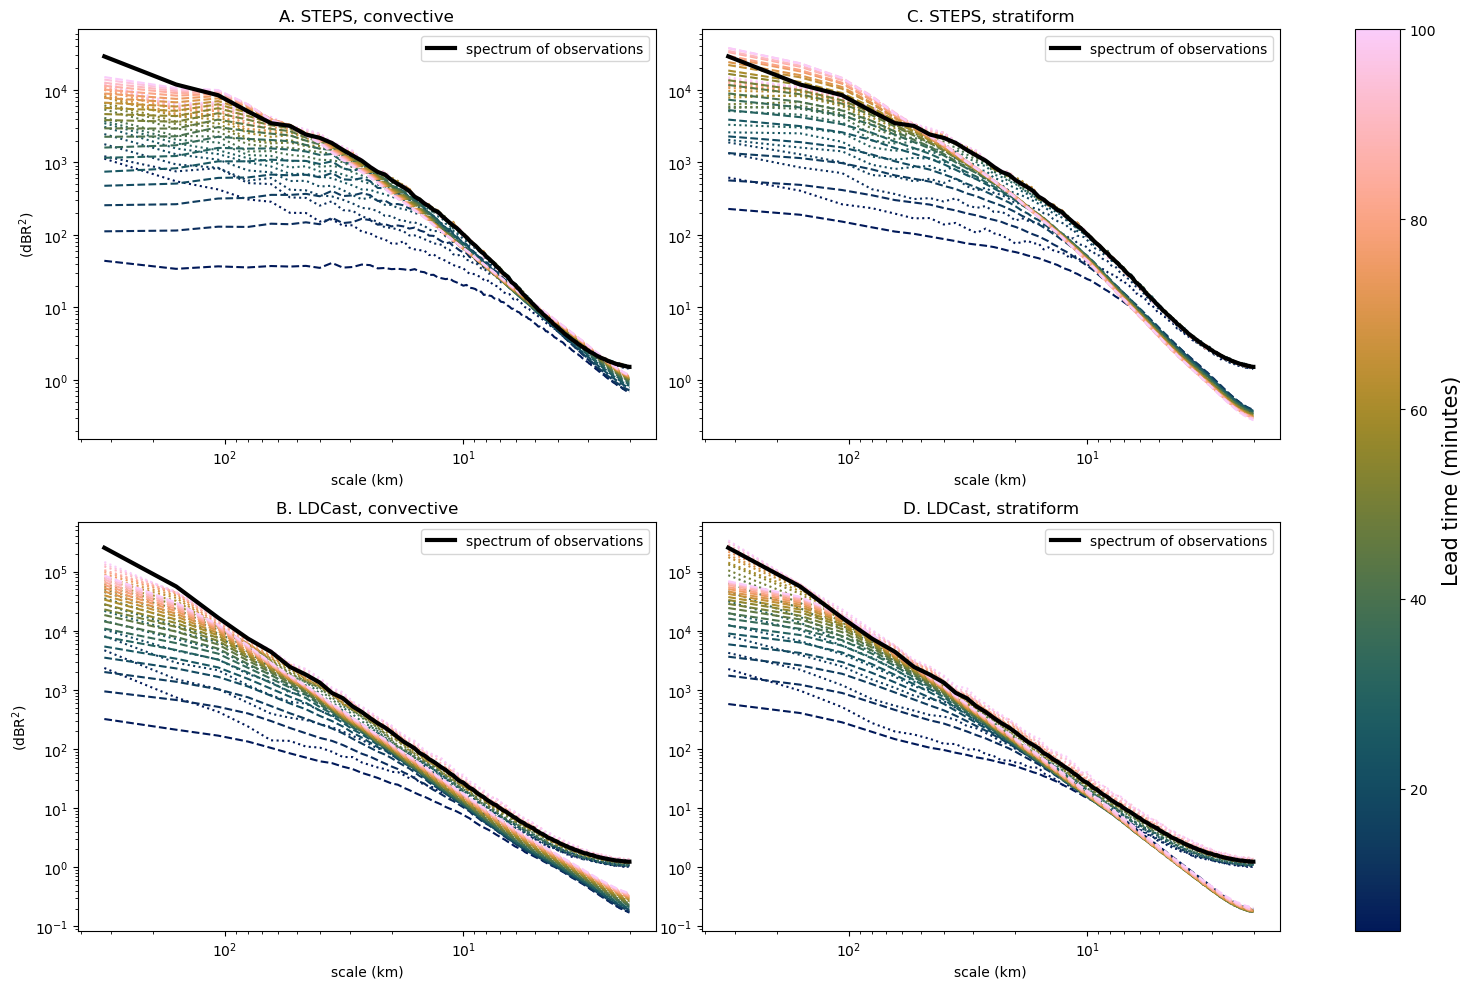

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))

axs[0, 1].sharey(axs[0, 0])
axs[1, 1].sharey(axs[1, 0])

norm = ax_spectral_field(axs[0, 0], res_conv_STEPS.original.spectral_error.mean(dim = 'central_time'),
                         cmap = cmap, title = 'A. STEPS, convective', ylabel = r'($\text{dBR}^2$)', linestyle = 'dotted')
norm = ax_spectral_field(axs[0, 0], res_conv_STEPS.original.spectral_variance.mean(dim = 'central_time'),
                         cmap = cmap, title = 'A. STEPS, convective', ylabel = r'($\text{dBR}^2$)', linestyle = 'dashed')
norm = ax_spectral_field(axs[1, 0], res_strat_STEPS.original.spectral_error.mean(dim = 'central_time'),
                         cmap = cmap, title = 'B. LDCast, convective', ylabel = r'($\text{dBR}^2$)', linestyle = 'dotted')
norm = ax_spectral_field(axs[1, 0], res_strat_STEPS.original.spectral_variance.mean(dim = 'central_time'),
                         cmap = cmap, title = 'B. LDCast, convective', ylabel = r'($\text{dBR}^2$)', linestyle = 'dashed')
norm = ax_spectral_field(axs[0, 1], res_conv_LDCast.original.spectral_error.mean(dim = 'central_time'),
                         cmap = cmap, title = 'C. STEPS, stratiform', linestyle = 'dotted')
norm = ax_spectral_field(axs[0, 1], res_conv_LDCast.original.spectral_variance.mean(dim = 'central_time'),
                         cmap = cmap, title = 'C. STEPS, stratiform', linestyle = 'dashed')
norm = ax_spectral_field(axs[1, 1], res_strat_LDCast.original.spectral_error.mean(dim = 'central_time'),
                         cmap = cmap, title = 'D. LDCast, stratiform', linestyle = 'dotted')
norm = ax_spectral_field(axs[1, 1], res_strat_LDCast.original.spectral_variance.mean(dim = 'central_time'),
                         cmap = cmap, title = 'D. LDCast, stratiform', linestyle = 'dashed')

fig.tight_layout()

# colorbar showing time
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('Lead time (minutes)', size = 15)

mean_spectrum_conv = res_conv_STEPS.original.spectral_observation.mean(dim = ('central_time', 'lead_time'))
mean_spectrum_strat = res_strat_STEPS.original.spectral_observation.mean(dim = ('central_time', 'lead_time'))
axs[0, 0].plot(mean_spectrum_conv.scale, mean_spectrum_conv, c = 'black', label = 'spectrum of observations', lw = 3)
axs[0, 1].plot(mean_spectrum_conv.scale, mean_spectrum_conv, c = 'black', label = 'spectrum of observations', lw = 3)
axs[1, 0].plot(mean_spectrum_strat.scale, mean_spectrum_strat, c = 'black', label = 'spectrum of observations', lw = 3)
axs[1, 1].plot(mean_spectrum_strat.scale, mean_spectrum_strat, c = 'black', label = 'spectrum of observations', lw = 3)

for ax in axs.flatten():
    ax.legend()

#plt.savefig('images/spectral_error_variance_STEPS_LDCast.png', bbox_inches='tight')

# Spectra of mean with respect to climatology

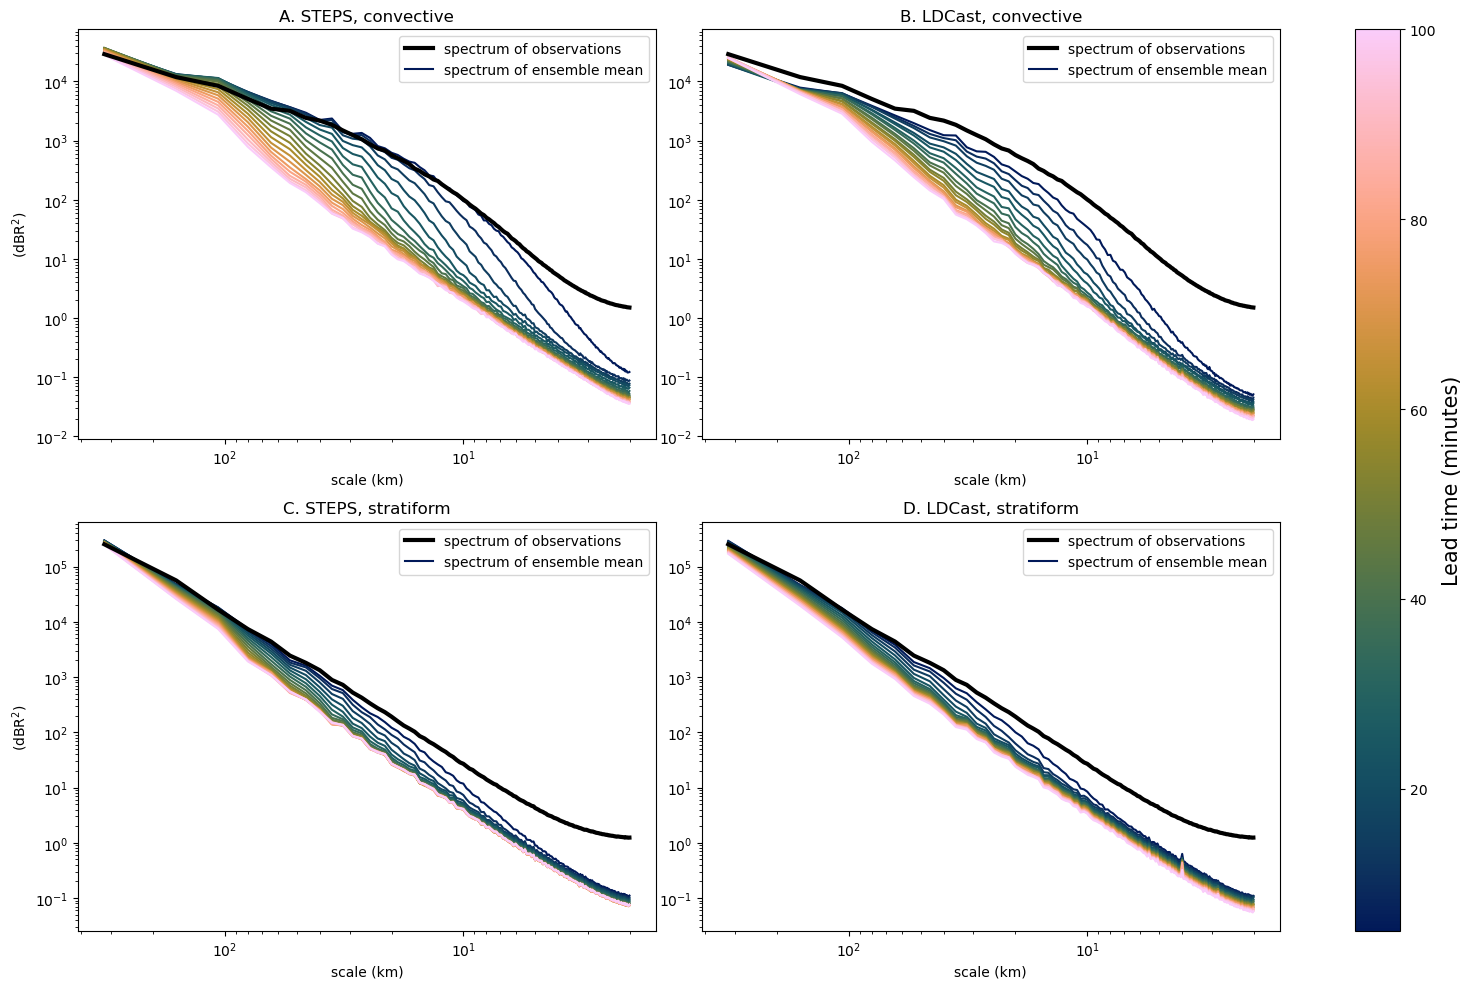

In [9]:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))

axs[0, 1].sharey(axs[0, 0])
axs[1, 1].sharey(axs[1, 0])

# plot the power spectrum of the ensemble mean
norm = ax_spectral_field(axs[0, 0], res_conv_STEPS.original.spectral_ensemble_mean.mean(dim = 'central_time'), cmap = cmap, ylabel = r'($\text{dBR}^2$)', title = 'A. STEPS, convective')
norm = ax_spectral_field(axs[0, 1], res_conv_LDCast.original.spectral_ensemble_mean.mean(dim = 'central_time'), cmap = cmap, title = 'B. LDCast, convective')
norm = ax_spectral_field(axs[1, 0], res_strat_STEPS.original.spectral_ensemble_mean.mean(dim = 'central_time'), cmap = cmap, ylabel = r'($\text{dBR}^2$)', title = 'C. STEPS, stratiform')
norm = ax_spectral_field(axs[1, 1], res_strat_LDCast.original.spectral_ensemble_mean.mean(dim = 'central_time'), cmap = cmap, title = 'D. LDCast, stratiform')

# plot the power spectra of observations
mean_spectrum_conv = res_conv_STEPS.original.spectral_observation.mean(dim = ('central_time', 'lead_time'))
mean_spectrum_strat = res_strat_STEPS.original.spectral_observation.mean(dim = ('central_time', 'lead_time'))
axs[0, 0].plot(mean_spectrum_conv.scale, mean_spectrum_conv, c = 'black', label = 'spectrum of observations', lw = 3)
axs[0, 1].plot(mean_spectrum_conv.scale, mean_spectrum_conv, c = 'black', label = 'spectrum of observations', lw = 3)
axs[1, 0].plot(mean_spectrum_strat.scale, mean_spectrum_strat, c = 'black', label = 'spectrum of observations', lw = 3)
axs[1, 1].plot(mean_spectrum_strat.scale, mean_spectrum_strat, c = 'black', label = 'spectrum of observations', lw = 3)

for ax in axs.flatten():
    ax.plot([], [], label = 'spectrum of ensemble mean')
    ax.legend()

fig.tight_layout()

# colorbar showing time
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = plt.colorbar(sm, ax = axs)
cbar.set_label('Lead time (minutes)', size = 15)

plt.savefig('images/spectrum_mean.png')

# Spread/skill ratio

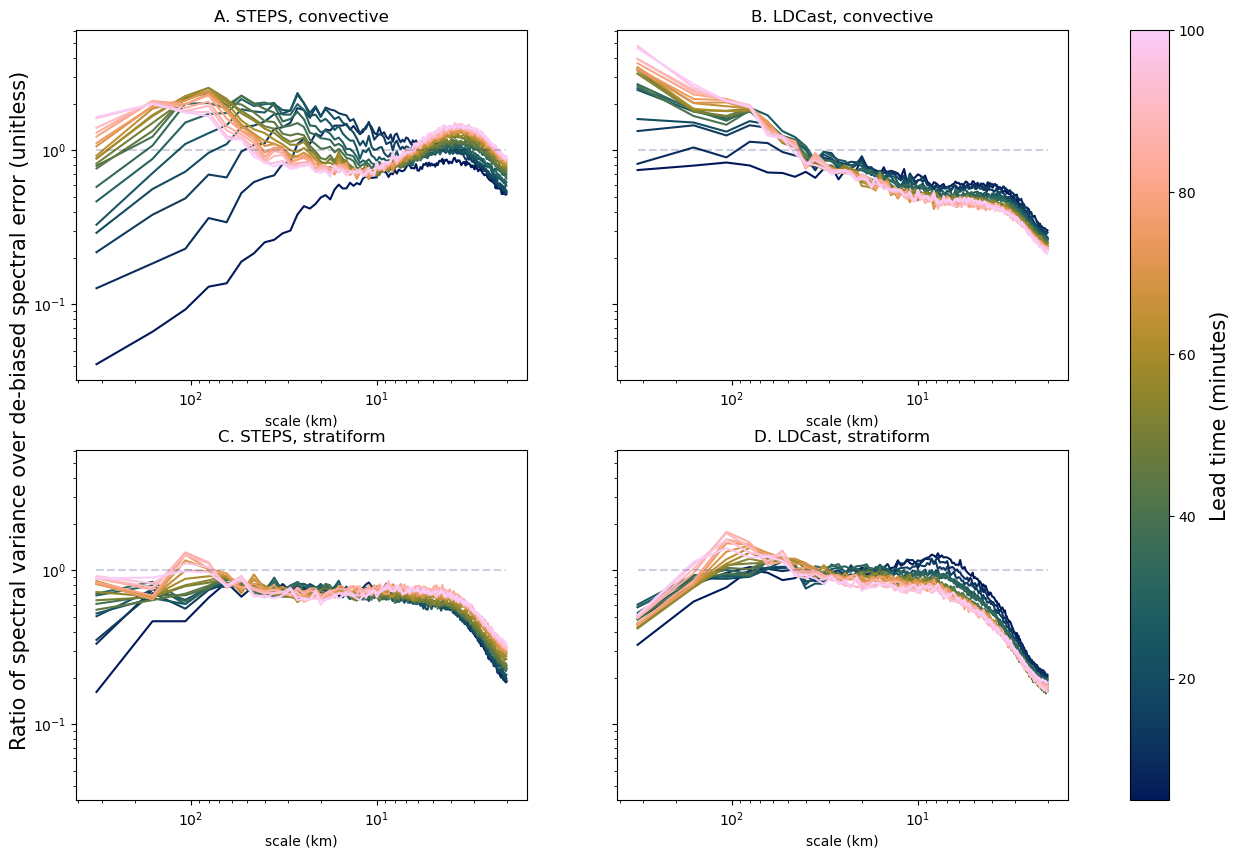

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (16, 10), sharey = True)

norm = ax_spectral_field(axs[0, 0], (res_conv_STEPS.original.spectral_variance / res_conv_STEPS.original.spectral_debiased_error).mean(dim = 'central_time'),
                         cmap = cmap, title = 'A. STEPS, convective')
norm = ax_spectral_field(axs[0, 1], (res_conv_LDCast.original.spectral_variance / res_conv_LDCast.original.spectral_debiased_error).mean(dim = 'central_time'),
                         cmap = cmap, title = 'B. LDCast, convective')
norm = ax_spectral_field(axs[1, 0], (res_strat_STEPS.original.spectral_variance / res_strat_STEPS.original.spectral_debiased_error).mean(dim = 'central_time'),
                         cmap = cmap, title = 'C. STEPS, stratiform')
norm = ax_spectral_field(axs[1, 1], (res_strat_LDCast.original.spectral_variance / res_strat_LDCast.original.spectral_debiased_error).mean(dim = 'central_time'),
                         cmap = cmap, title = 'D. LDCast, stratiform')

for ax in axs.flatten():
    ax.plot(res_conv_STEPS.scale, np.full(len(res_conv_STEPS.scale), 1), linestyle = 'dashed', alpha = 0.2)

fig.text(0.09, 0.5, 'Ratio of spectral variance over de-biased spectral error (unitless)', rotation = 'vertical', ha = 'center', va = 'center', size = 15)

# colorbar showing time
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('Lead time (minutes)', size = 15)

plt.savefig('images/spread-skill_STEPS_LDCast.png')

# Spectra of ensemble modes

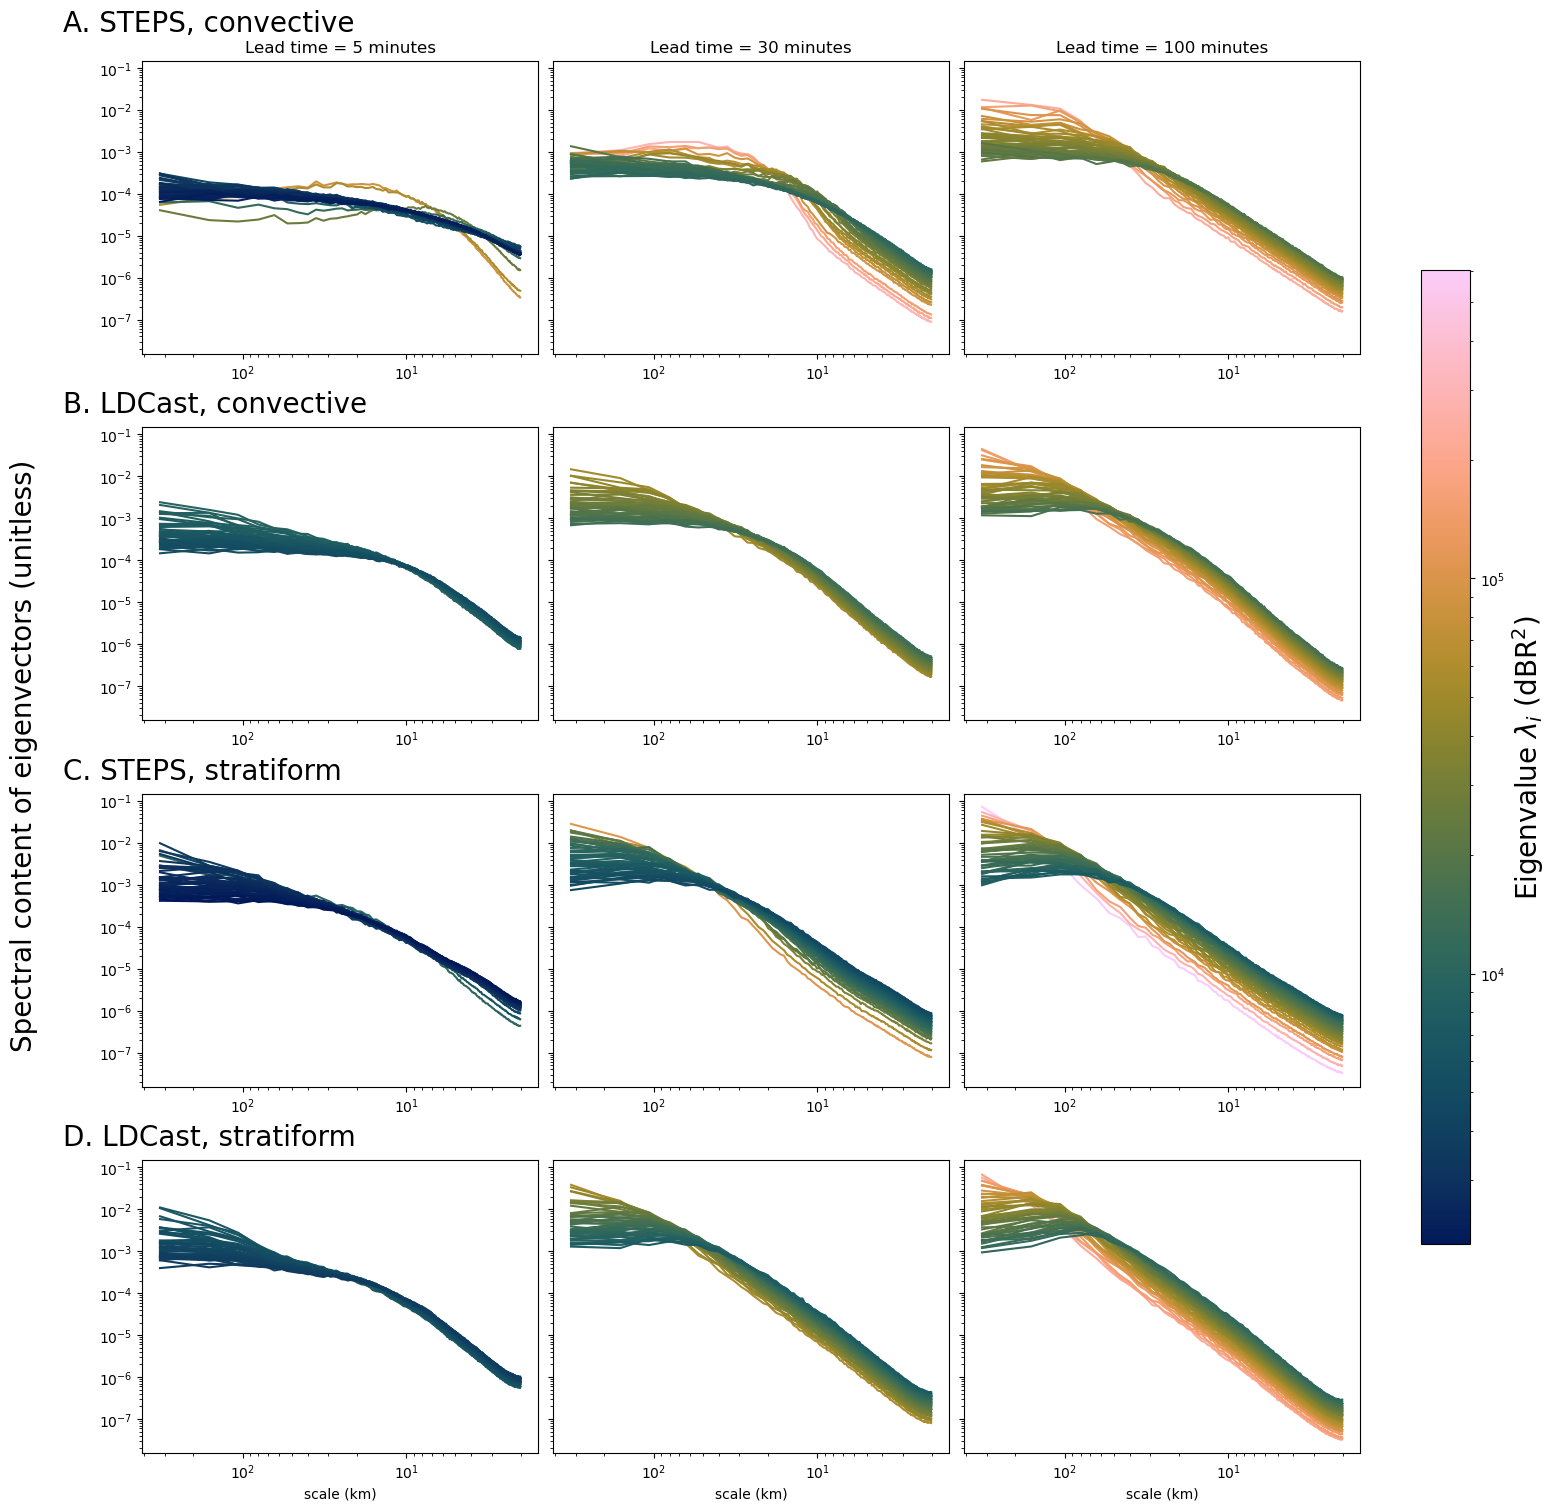

In [27]:
t_plots = np.array([0, 5, 19])
time_plots = (t_plots + 1) * 5

fig, axs = plt.subplots(4, len(t_plots), figsize = (len(t_plots) * 5, 15), sharey = True, constrained_layout = True)

norm = mcolors.LogNorm(vmin = np.min([res_conv_STEPS.original.eigenval.mean(dim = 'central_time'),
                                      res_conv_LDCast.original.eigenval.mean(dim = 'central_time'),
                                      res_strat_STEPS.original.eigenval.mean(dim = 'central_time'),
                                      res_strat_LDCast.original.eigenval.mean(dim = 'central_time')]),
                       vmax = np.max([res_conv_STEPS.original.eigenval.mean(dim = 'central_time'),
                                      res_conv_LDCast.original.eigenval.mean(dim = 'central_time'),
                                      res_strat_STEPS.original.eigenval.mean(dim = 'central_time'),
                                      res_strat_LDCast.original.eigenval.mean(dim = 'central_time')]))

eigenval = res_conv_STEPS.original.eigenval.mean(dim = 'central_time')
axs_spectral_vec(axs[0], eigenval, res_conv_STEPS.original.spectral_eigenvec.mean(dim = 'central_time'), t_plots, norm, cmap = cmap)
                         
eigenval = res_conv_LDCast.original.eigenval.mean(dim = 'central_time')
axs_spectral_vec(axs[1], eigenval, res_conv_LDCast.original.spectral_eigenvec.mean(dim = 'central_time'),t_plots, norm, cmap = cmap)

eigenval = res_strat_STEPS.original.eigenval.mean(dim = 'central_time')
axs_spectral_vec(axs[2], eigenval, res_strat_STEPS.original.spectral_eigenvec.mean(dim = 'central_time'), t_plots, norm, cmap = cmap)

eigenval = res_strat_LDCast.original.eigenval.mean(dim = 'central_time')
axs_spectral_vec(axs[3], eigenval, res_strat_LDCast.original.spectral_eigenvec.mean(dim = 'central_time'), t_plots, norm, cmap = cmap)

fig.text(-0.02, 0.5,'Spectral content of eigenvectors (unitless)', ha = 'center', va = 'center', rotation = 'vertical', size = 20)
axs[0, 0].text(-0.2, 1.1, 'A. STEPS, convective', transform = axs[0, 0].transAxes, size = 20)
axs[1, 0].text(-0.2, 1.05, 'B. LDCast, convective', transform = axs[1, 0].transAxes, size = 20)
axs[2, 0].text(-0.2, 1.05, 'C. STEPS, stratiform', transform = axs[2, 0].transAxes, size = 20)
axs[3, 0].text(-0.2, 1.05, 'D. LDCast, stratiform', transform = axs[3, 0].transAxes, size = 20)

# colorbar showing eigenvalue
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = plt.colorbar(sm, ax = axs, shrink = 0.7)
cbar.set_label(r'Eigenvalue $\lambda_i$ ($\text{dBR}^2$)', size = 20)

for t, time in enumerate(time_plots):
    axs[0, t].set_title(f'Lead time = {time} minutes')
    axs[-1, t].set_xlabel('scale (km)')

plt.savefig('images/spectral_eigenvec_STEPS_LDCast.png', bbox_inches='tight')

# Projection of error on ensemble members

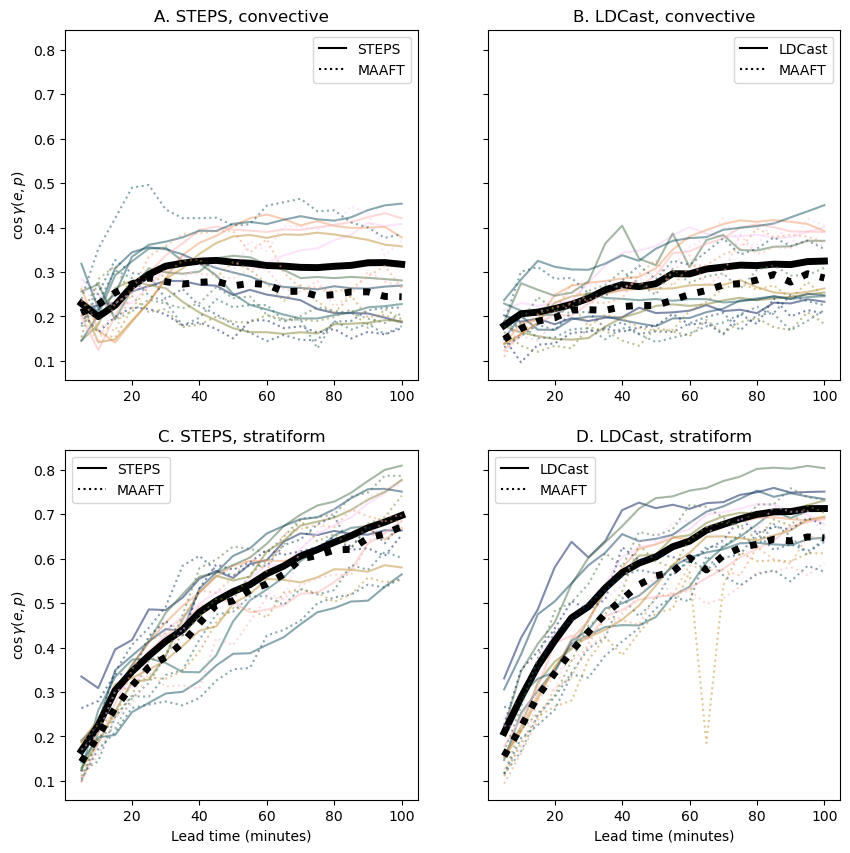

In [15]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey = True)

ax_cosine_error_projection(axs[0, 0], res_conv_STEPS.original.cosine_error_projection, 'STEPS', title = 'A. STEPS, convective')
ax_cosine_error_projection(axs[0, 0], res_conv_STEPS.maaft.cosine_error_projection, 'MAAFT', linestyle = 'dotted')

ax_cosine_error_projection(axs[0, 1], res_conv_LDCast.original.cosine_error_projection, 'LDCast', title = 'B. LDCast, convective')
ax_cosine_error_projection(axs[0, 1], res_conv_LDCast.maaft.cosine_error_projection, 'MAAFT', linestyle = 'dotted')

ax_cosine_error_projection(axs[1, 0], res_strat_STEPS.original.cosine_error_projection, 'STEPS', title = 'C. STEPS, stratiform')
ax_cosine_error_projection(axs[1, 0], res_strat_STEPS.maaft.cosine_error_projection, 'MAAFT', linestyle = 'dotted')

ax_cosine_error_projection(axs[1, 1], res_strat_LDCast.original.cosine_error_projection, 'LDCast', title = 'D. LDCast, stratiform')
ax_cosine_error_projection(axs[1, 1], res_strat_LDCast.maaft.cosine_error_projection, 'MAAFT', linestyle = 'dotted')

for ax in axs.flatten():
    ax.legend()

axs[1, 0].set_xlabel('Lead time (minutes)')
axs[1, 1].set_xlabel('Lead time (minutes)')

axs[0, 0].set_ylabel(r'$\cos\gamma(e, p)$')
axs[1, 0].set_ylabel(r'$\cos\gamma(e, p)$')

plt.savefig('images/projection_STEPS_LDCast_MAAFT.png')

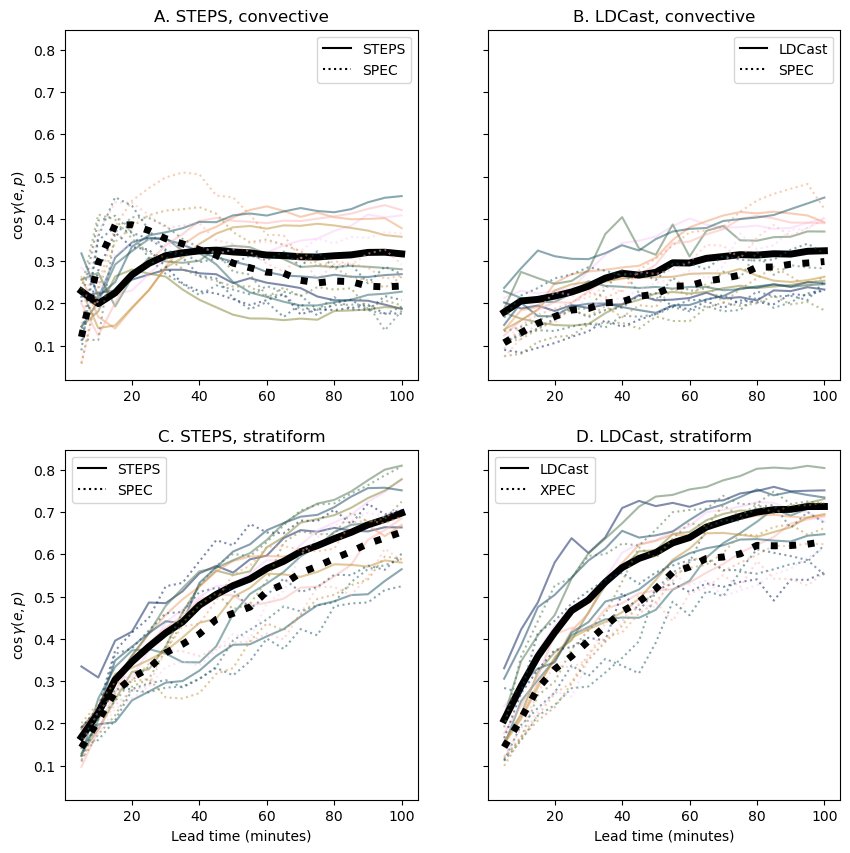

In [16]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey = True)

ax_cosine_error_projection(axs[0, 0], res_conv_STEPS.original.cosine_error_projection, 'STEPS', title = 'A. STEPS, convective')
ax_cosine_error_projection(axs[0, 0], res_conv_STEPS.spectral.cosine_error_projection, 'SPEC', linestyle = 'dotted')

ax_cosine_error_projection(axs[0, 1], res_conv_LDCast.original.cosine_error_projection, 'LDCast', title = 'B. LDCast, convective')
ax_cosine_error_projection(axs[0, 1], res_conv_LDCast.spectral.cosine_error_projection, 'SPEC', linestyle = 'dotted')

ax_cosine_error_projection(axs[1, 0], res_strat_STEPS.original.cosine_error_projection, 'STEPS', title = 'C. STEPS, stratiform')
ax_cosine_error_projection(axs[1, 0], res_strat_STEPS.spectral.cosine_error_projection, 'SPEC', linestyle = 'dotted')

ax_cosine_error_projection(axs[1, 1], res_strat_LDCast.original.cosine_error_projection, 'LDCast', title = 'D. LDCast, stratiform')
ax_cosine_error_projection(axs[1, 1], res_strat_LDCast.spectral.cosine_error_projection, 'XPEC', linestyle = 'dotted')

for ax in axs.flatten():
    ax.legend()

axs[1, 0].set_xlabel('Lead time (minutes)')
axs[1, 1].set_xlabel('Lead time (minutes)')

axs[0, 0].set_ylabel(r'$\cos\gamma(e, p)$')
axs[1, 0].set_ylabel(r'$\cos\gamma(e, p)$')

plt.savefig('images/projection_STEPS_LDCast_SPEC.png')

# FSS

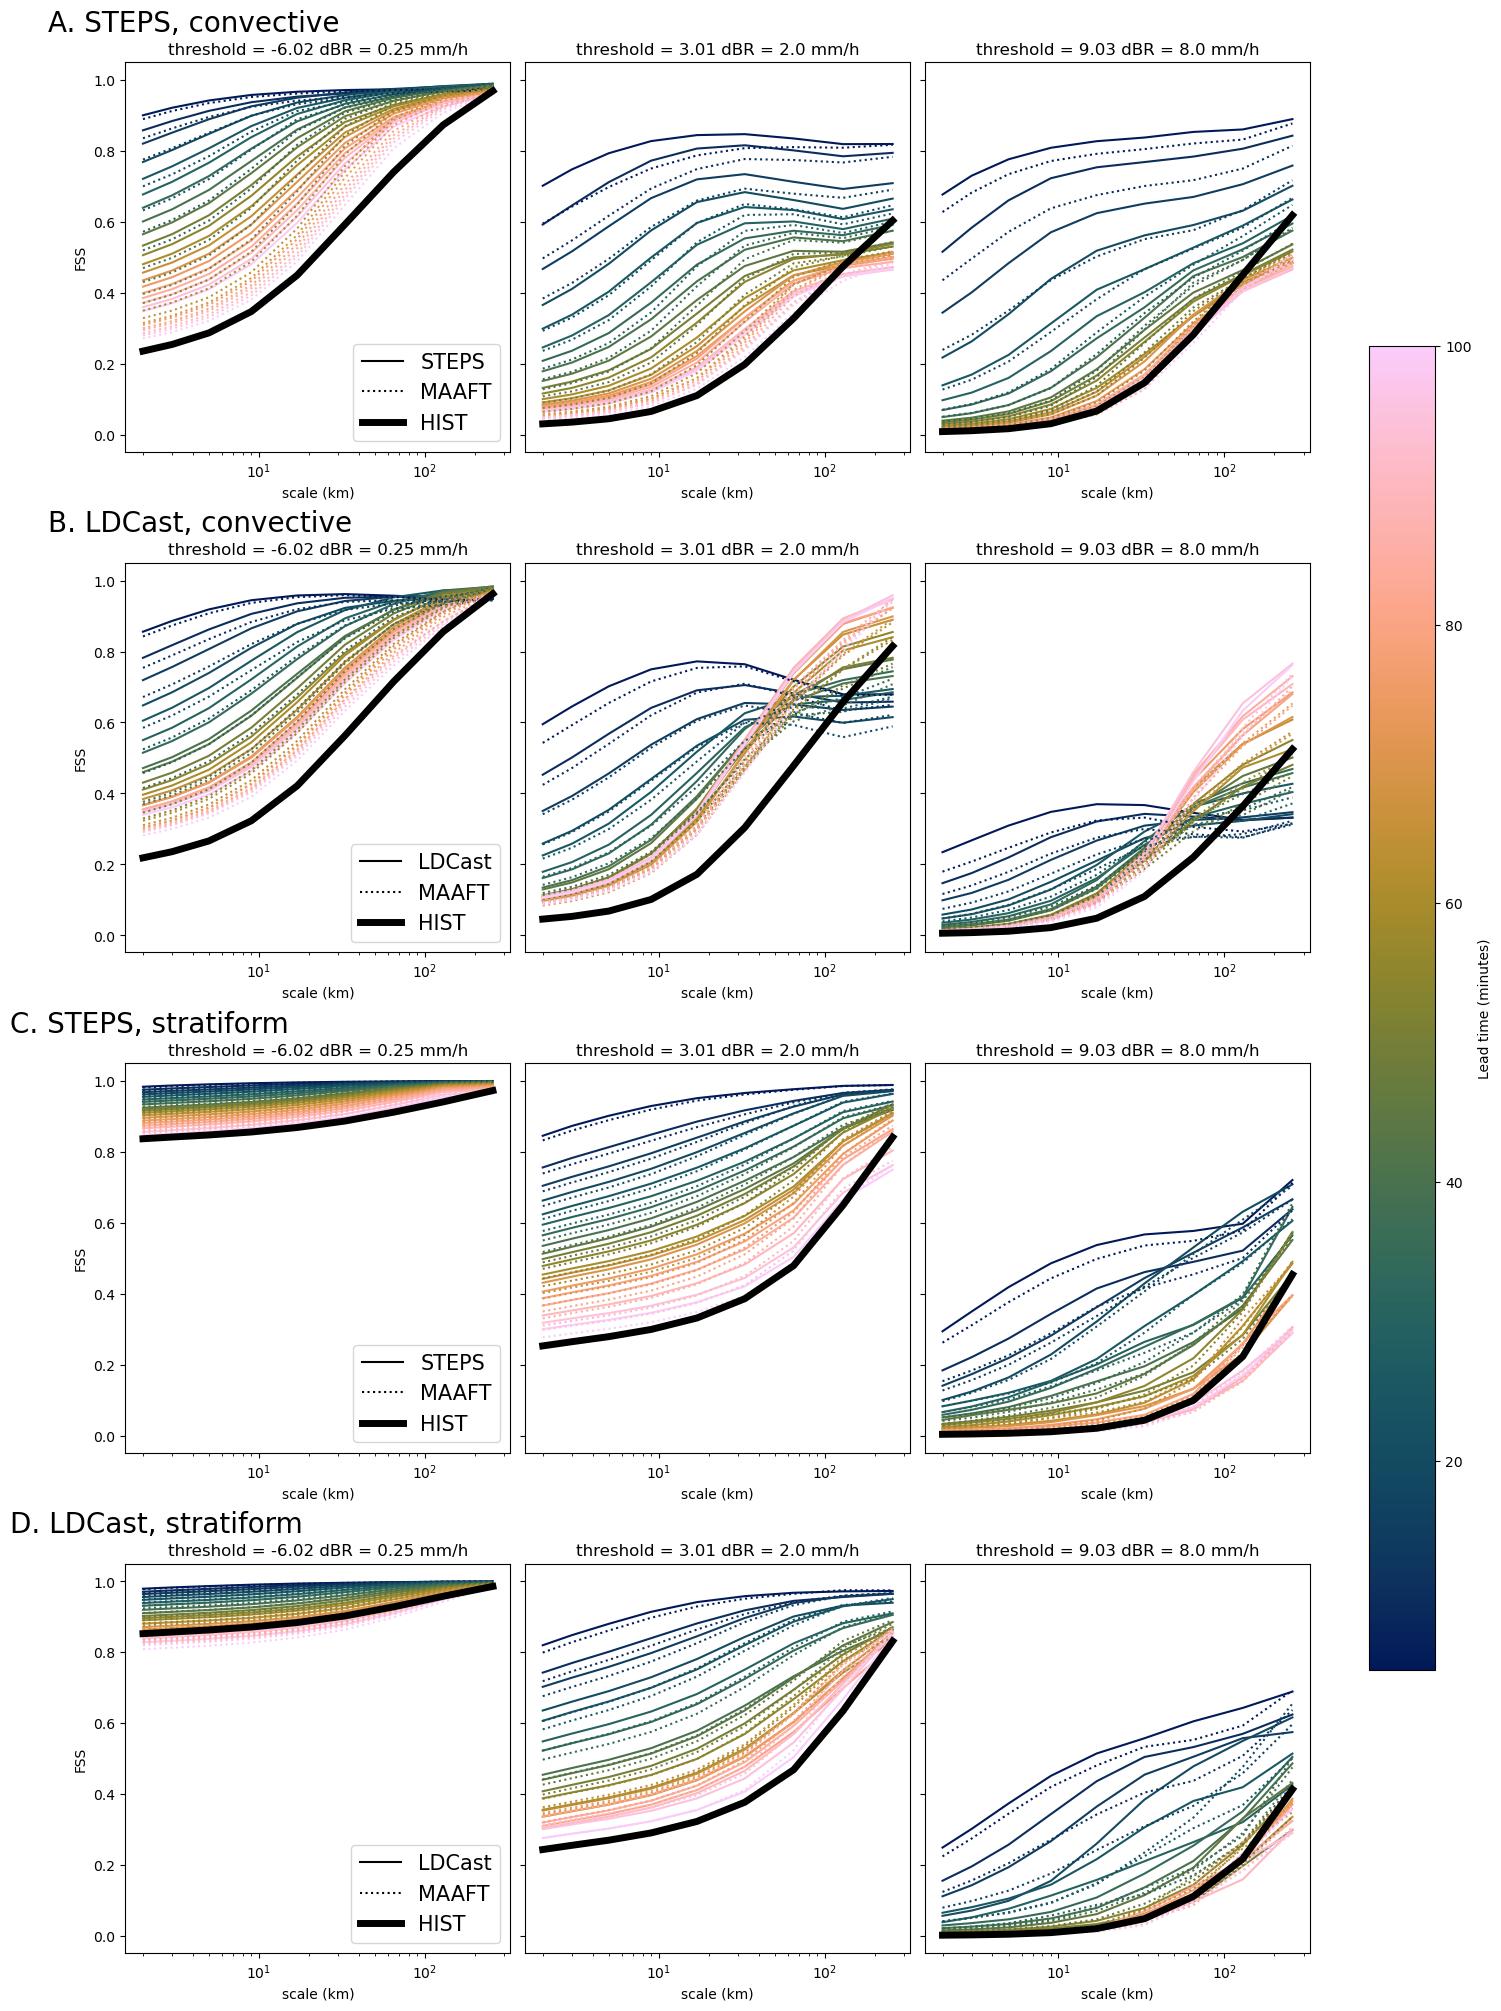

In [14]:
idxs_thresholds = np.array([0, 3, 5])

fig, axs = plt.subplots(4, 3, figsize = (15, 20), sharey = True, constrained_layout = True)

# FSS for STEPS and LDCast
norm = axs_FSS(axs[0], res_conv_STEPS.original.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, label = 'STEPS')
norm = axs_FSS(axs[1], res_conv_LDCast.original.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, label = 'LDCast')
norm = axs_FSS(axs[2], res_strat_STEPS.original.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, label = 'STEPS')
norm = axs_FSS(axs[3], res_strat_LDCast.original.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, label = 'LDCast')

# FSS for MAAFT
norm = axs_FSS(axs[0], res_conv_STEPS.maaft.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, linestyle = 'dotted', label = 'MAAFT')
norm = axs_FSS(axs[1], res_conv_LDCast.maaft.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, linestyle = 'dotted', label = 'MAAFT')
norm = axs_FSS(axs[2], res_strat_STEPS.maaft.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, linestyle = 'dotted', label = 'MAAFT')
norm = axs_FSS(axs[3], res_strat_LDCast.maaft.FSS.isel(threshold_FSS = idxs_thresholds).mean(dim = 'central_time'), cmap = cmap, linestyle = 'dotted', label = 'MAAFT')

# FSS for HIST
for thr, thresh in enumerate(res_conv_STEPS.threshold_FSS[idxs_thresholds]):
    axs[0, thr].plot(res_conv_STEPS.scale_FSS, res_conv_STEPS.hist.FSS.mean(dim = ('central_time', 'lead_time')).sel(threshold_FSS = thresh), linewidth = 5, c = 'black', label = 'HIST')
    axs[1, thr].plot(res_conv_LDCast.scale_FSS, res_conv_LDCast.hist.FSS.mean(dim = ('central_time', 'lead_time')).sel(threshold_FSS = thresh), linewidth = 5, c = 'black', label = 'HIST')
    axs[2, thr].plot(res_strat_STEPS.scale_FSS, res_strat_STEPS.hist.FSS.mean(dim = ('central_time', 'lead_time')).sel(threshold_FSS = thresh), linewidth = 5, c = 'black', label = 'HIST')
    axs[3, thr].plot(res_strat_LDCast.scale_FSS, res_strat_LDCast.hist.FSS.mean(dim = ('central_time', 'lead_time')).sel(threshold_FSS = thresh), linewidth = 5, c = 'black', label = 'HIST')

for i in range(4):
    axs[i, 0].legend(prop = {'size': 15}, loc = 'lower right')

# colorbar showing time
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = plt.colorbar(sm, ax = axs, shrink = 0.7)
cbar.set_label('Lead time (minutes)')

axs[0, 0].text(-0.2, 1.08, 'A. STEPS, convective', transform = axs[0, 0].transAxes, size = 20)
axs[1, 0].text(-0.2, 1.08, 'B. LDCast, convective', transform = axs[1, 0].transAxes, size = 20)
axs[2, 0].text(-0.3, 1.08, 'C. STEPS, stratiform', transform = axs[2, 0].transAxes, size = 20)
axs[3, 0].text(-0.3, 1.08, 'D. LDCast, stratiform', transform = axs[3, 0].transAxes, size = 20)

plt.savefig('images/FSS_STEPS_LDCast.png', bbox_inches='tight')

# Spatial variance

In [181]:
evaluation_mask = xr.open_dataarray('../data_events/evaluation_mask.nc')

In [183]:
# open predictions files
pred_conv_STEPS = xr.open_zarr('../STEPS/data/predictions_convective.zarr',
                               chunks = 'auto').predictions.where(evaluation_mask, drop = True)
pred_conv_LDCast = xr.open_zarr('../LDCast/data/predictions_convective.zarr',
                                chunks = 'auto').predictions.where(evaluation_mask, drop = True)
pred_strat_STEPS = xr.open_zarr('../STEPS/data/predictions_stratiform.zarr',
                                chunks = 'auto').predictions.where(evaluation_mask, drop = True)
pred_strat_LDCast = xr.open_zarr('../LDCast/data/predictions_stratiform.zarr',
                                 chunks = 'auto').predictions.where(evaluation_mask, drop = True)

In [186]:
# open observations files
events_stratiform = xr.open_dataset('../data_events/stratiform_events.nc',
                                    chunks = {'central_time': 1, 'lead_time': 1, 'y': -1, 'x': -1}).precip_intensity_EDK.where(evaluation_mask, drop = True)
events_convective = xr.open_dataset('../data_events/convective_events.nc',
                                    chunks = {'central_time': 1, 'lead_time': 1, 'y': -1, 'x': -1}).precip_intensity_EDK.where(evaluation_mask, drop = True)

observations_convective = events_convective.isel(lead_time = np.arange(4, 24))
observations_stratiform = events_stratiform.isel(lead_time = np.arange(4, 24))

In [188]:
# indexes of the lead times to plot
lt_plots = [0, 5, 15]

# select the observations to plot and compute the standard deviations
obs_conv = observations_convective.isel(central_time = 0, lead_time = lt_plots)
std_conv_STEPS = np.nanstd(pred_conv_STEPS.isel(central_time = 0, lead_time = lt_plots), axis = 1)
std_conv_LDCast = np.std(pred_conv_LDCast.isel(central_time = 0, lead_time = lt_plots), axis = 1)
obs_strat = observations_stratiform.isel(central_time = 0, lead_time = lt_plots)
std_strat_STEPS = np.nanstd(pred_strat_STEPS.isel(central_time = 0, lead_time = lt_plots), axis = 1)
std_strat_LDCast = np.std(pred_strat_LDCast.isel(central_time = 0, lead_time = lt_plots), axis = 1)

In [191]:
# select one member to plot
member_conv_STEPS = pred_conv_STEPS.isel(central_time = 0, lead_time = lt_plots, member = 0).compute()
member_strat_STEPS = pred_strat_STEPS.isel(central_time = 0, lead_time = lt_plots, member = 0).compute()
member_conv_LDCast = pred_conv_LDCast.isel(central_time = 0, lead_time = lt_plots, member = 0).compute()
member_strat_LDCast = pred_strat_LDCast.isel(central_time = 0, lead_time = lt_plots, member = 0).compute()

In [193]:
# compute the ensemble mean
mean_conv_STEPS = np.nanmean(pred_conv_STEPS.isel(central_time = 0, lead_time = lt_plots), axis = 1)
mean_conv_LDCast = np.mean(pred_conv_LDCast.isel(central_time = 0, lead_time = lt_plots), axis = 1)
mean_strat_STEPS = np.nanmean(pred_strat_STEPS.isel(central_time = 0, lead_time = lt_plots), axis = 1)
mean_strat_LDCast = np.mean(pred_strat_LDCast.isel(central_time = 0, lead_time = lt_plots), axis = 1)

In [194]:
subplot_size = 3

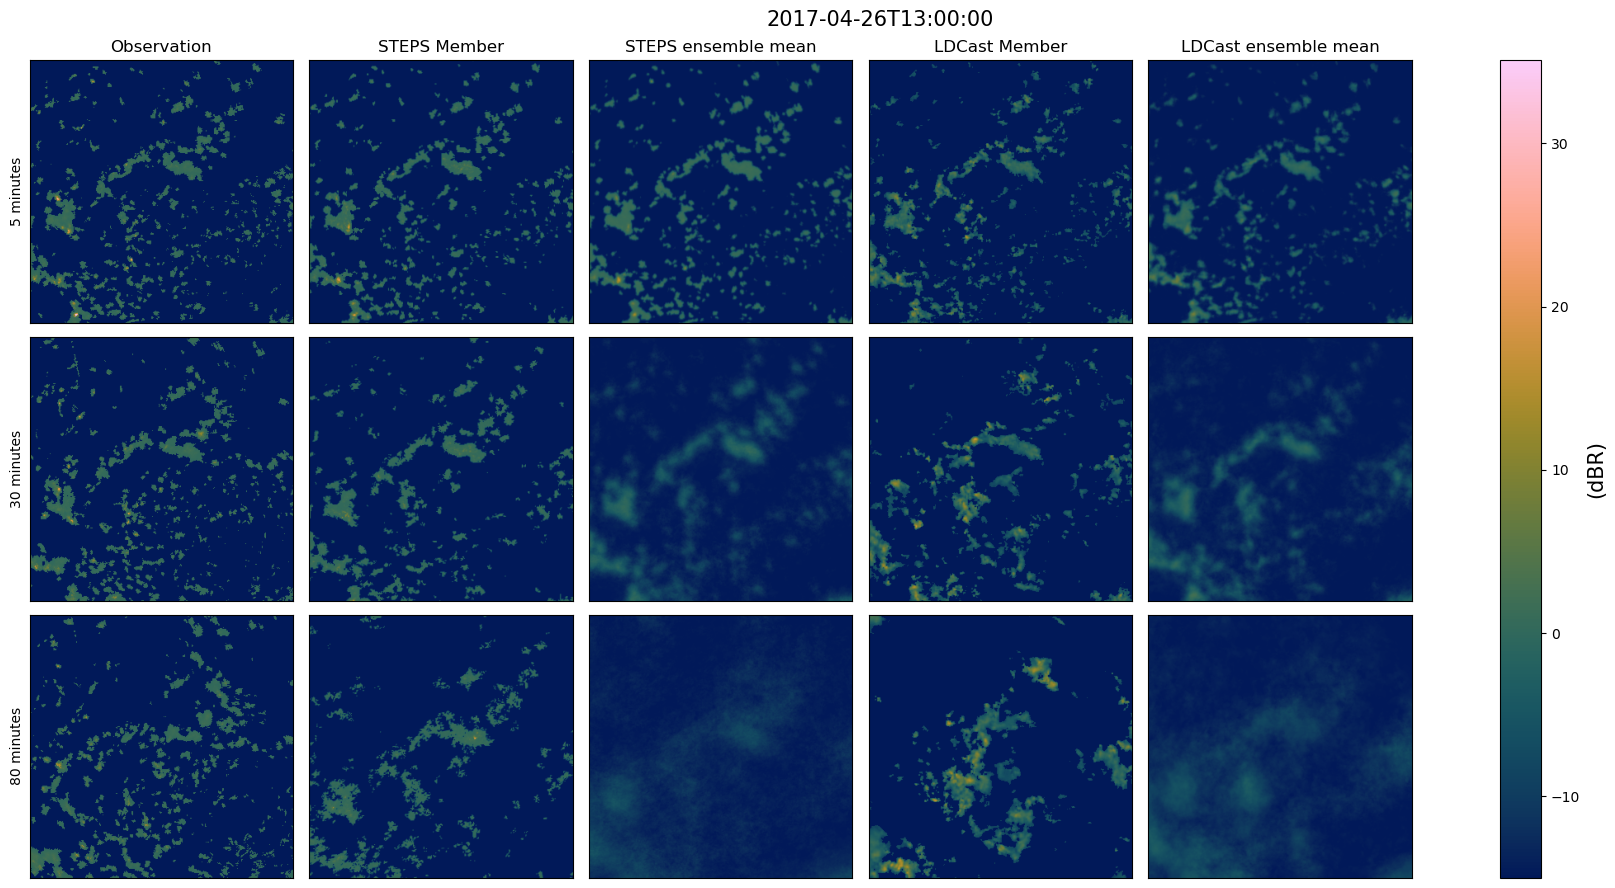

In [195]:
fig, axs = plt.subplots(len(lt_plots), 5, figsize = (5 * subplot_size + 3, len(lt_plots) * subplot_size))

conv_central_time = pred_conv_STEPS.central_time.isel(central_time = 0)

mi = np.nanmin([member_conv_STEPS,
                mean_conv_STEPS,
                obs_conv,
                member_conv_LDCast,
                mean_conv_LDCast
               ])
ma = np.nanmax([member_conv_STEPS,
                mean_conv_STEPS,
                obs_conv,
                member_conv_LDCast,
                mean_conv_LDCast
               ])

for l, lt in enumerate(lt_plots):
    axs[l, 0].imshow(obs_conv[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 1].imshow(member_conv_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 2].imshow(mean_conv_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 3].imshow(member_conv_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 4].imshow(mean_conv_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 0].set_ylabel(f'{(lt_plots[l] + 1) * 5} minutes')

for ax in axs.flatten():
    ax.set_xticks(ticks = [])
    ax.set_yticks(ticks = [])

axs[0, 0].set_title('Observation')
axs[0, 1].set_title('STEPS Member')
axs[0, 2].set_title('STEPS ensemble mean')
axs[0, 3].set_title('LDCast Member')
axs[0, 4].set_title('LDCast ensemble mean')

fig.suptitle(f"{conv_central_time.data.astype('datetime64[s]')}", size = 15)

fig.tight_layout(pad=1.0)

# colorbar showing dBR
norm = mcolors.Normalize(vmin = mi, vmax = ma)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('(dBR)', size = 15)

plt.savefig('images/nowcasts_convective.png')

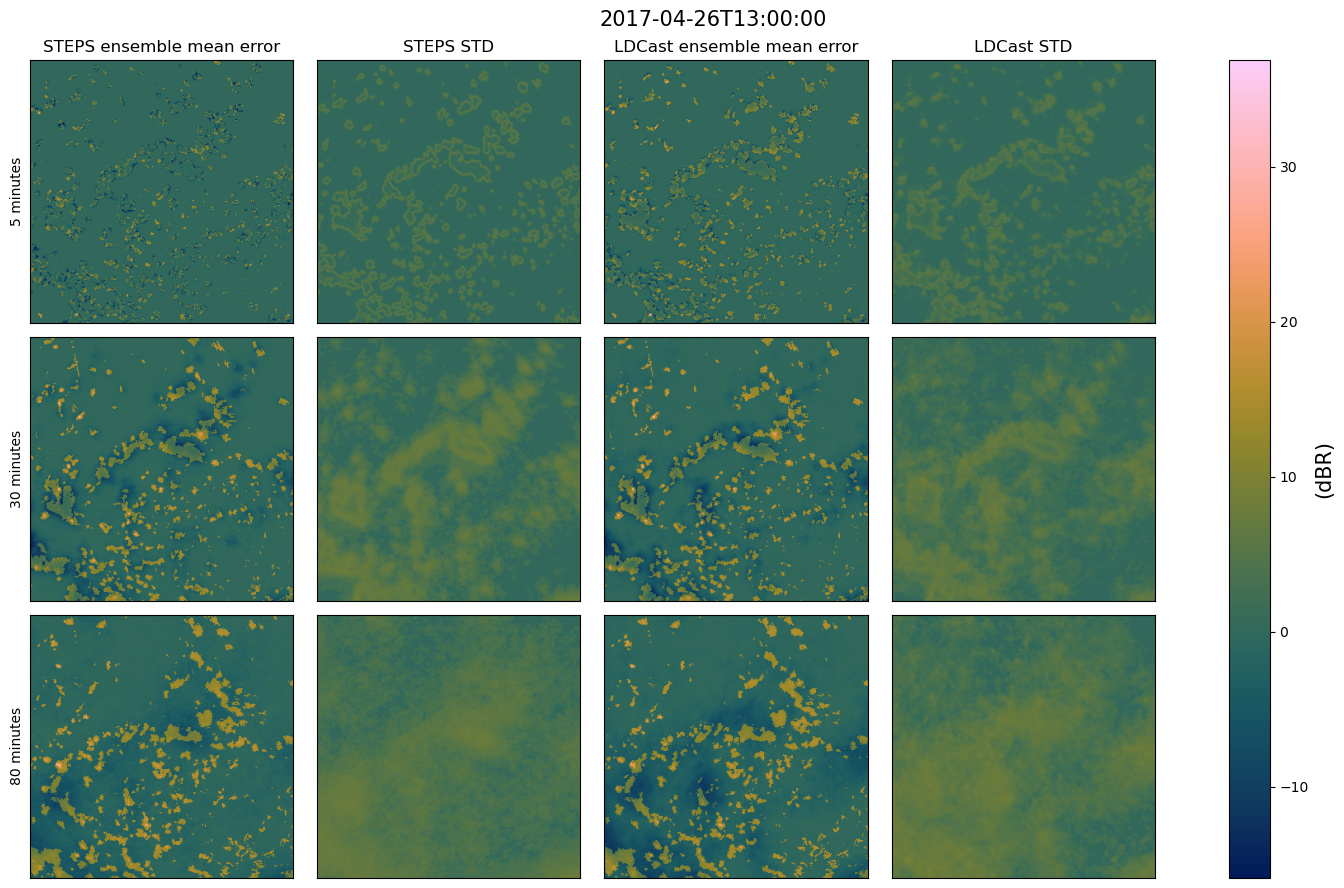

In [196]:
fig, axs = plt.subplots(len(lt_plots), 4, figsize = (4 * subplot_size + 3, len(lt_plots) * subplot_size))

conv_central_time = pred_conv_STEPS.central_time.isel(central_time = 0)

mi = np.nanmin([obs_conv - mean_conv_STEPS,
                std_conv_STEPS,
                obs_conv - mean_conv_LDCast,
                std_conv_LDCast,               
               ])
ma = np.nanmax([obs_conv - mean_conv_STEPS,
                std_conv_STEPS,
                obs_conv - mean_conv_LDCast,
                std_conv_LDCast,
               ])

for l, lt in enumerate(lt_plots):
    axs[l, 0].imshow(obs_conv[l] - mean_conv_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 1].imshow(std_conv_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 2].imshow(obs_conv[l] - mean_conv_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 3].imshow(std_conv_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 0].set_ylabel(f'{(lt_plots[l] + 1) * 5} minutes')

for ax in axs.flatten():
    ax.set_xticks(ticks = [])
    ax.set_yticks(ticks = [])

axs[0, 0].set_title(f'STEPS ensemble mean error')
axs[0, 1].set_title(f'STEPS STD')
axs[0, 2].set_title(f'LDCast ensemble mean error')
axs[0, 3].set_title(f'LDCast STD')

fig.suptitle(f"{conv_central_time.data.astype('datetime64[s]')}", size = 15)

fig.tight_layout(pad=1.0)

# colorbar showing dBR
norm = mcolors.Normalize(vmin = mi, vmax = ma)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('(dBR)', size = 15)

plt.savefig('images/spatial_variance_convective.png')

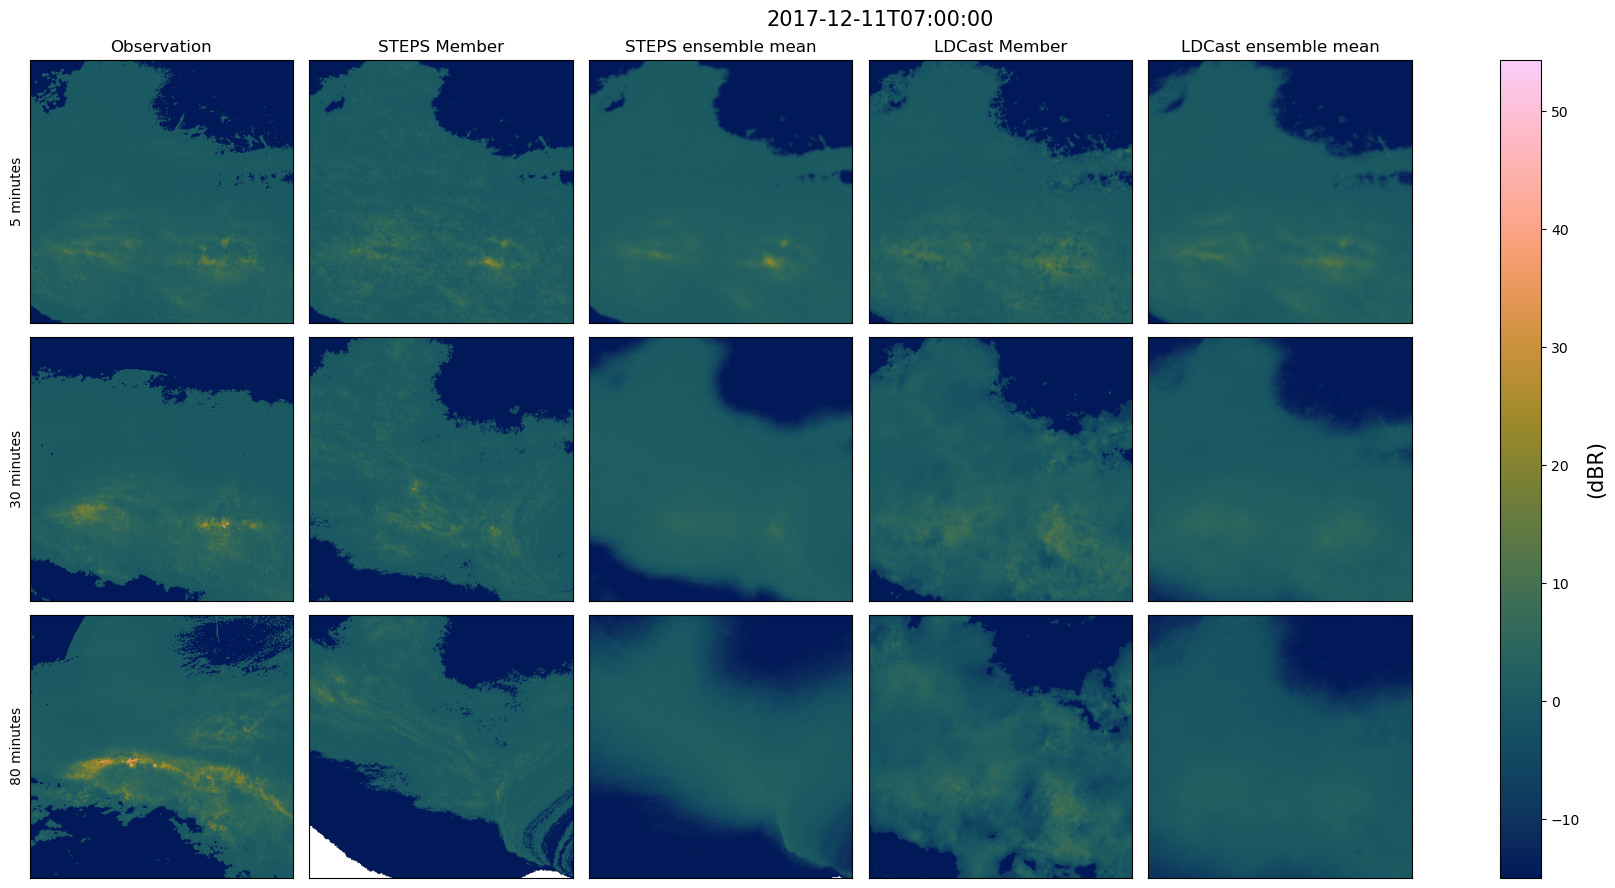

In [197]:
fig, axs = plt.subplots(len(lt_plots), 5, figsize = (5 * subplot_size + 3, len(lt_plots) * subplot_size))

strat_central_time = pred_strat_STEPS.central_time.isel(central_time = 0)

mi = np.nanmin([member_strat_STEPS,
                mean_strat_STEPS,
                obs_strat,
                member_strat_LDCast,
                mean_strat_LDCast
               ])
ma = np.nanmax([member_strat_STEPS,
                mean_strat_STEPS,
                obs_strat,
                member_strat_LDCast,
                mean_strat_LDCast
               ])

for l, lt in enumerate(lt_plots):
    axs[l, 0].imshow(obs_strat[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 1].imshow(member_strat_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 2].imshow(mean_strat_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 3].imshow(member_strat_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 4].imshow(mean_strat_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 0].set_ylabel(f'{(lt_plots[l] + 1) * 5} minutes')

for ax in axs.flatten():
    ax.set_xticks(ticks = [])
    ax.set_yticks(ticks = [])

axs[0, 0].set_title('Observation')
axs[0, 1].set_title('STEPS Member')
axs[0, 2].set_title('STEPS ensemble mean')
axs[0, 3].set_title('LDCast Member')
axs[0, 4].set_title('LDCast ensemble mean')

fig.suptitle(f"{strat_central_time.data.astype('datetime64[s]')}", size = 15)

fig.tight_layout(pad=1.0)

# colorbar showing dBR
norm = mcolors.Normalize(vmin = mi, vmax = ma)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('(dBR)', size = 15)

plt.savefig('images/nowcasts_stratiform.png')

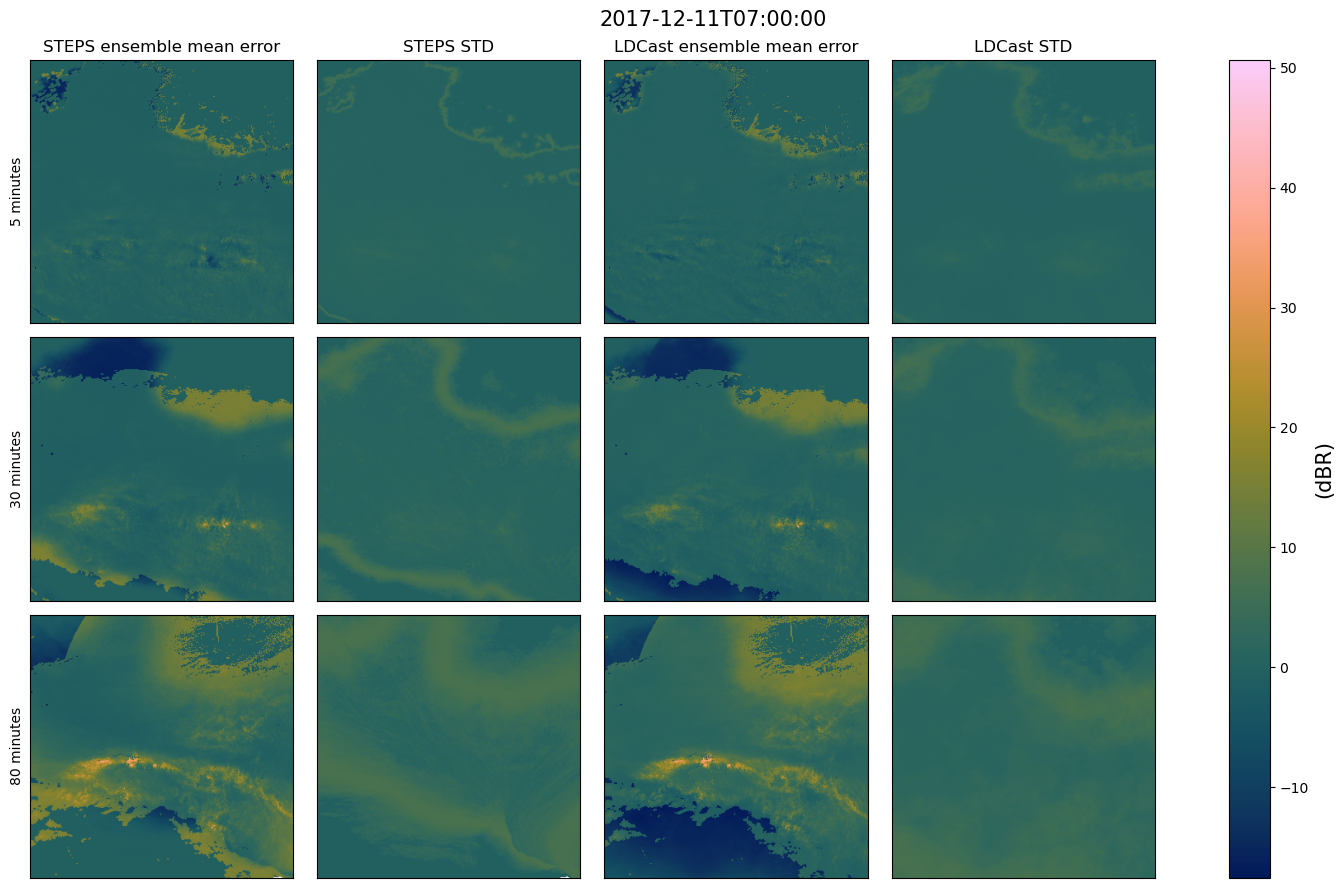

In [198]:
fig, axs = plt.subplots(len(lt_plots), 4, figsize = (4 * subplot_size + 3, len(lt_plots) * subplot_size))

strat_central_time = pred_strat_STEPS.central_time.isel(central_time = 0)

mi = np.nanmin([obs_strat - mean_strat_STEPS,
                std_strat_STEPS,
                obs_strat - mean_strat_LDCast,
                std_strat_LDCast,               
               ])
ma = np.nanmax([obs_strat - mean_strat_STEPS,
                std_strat_STEPS,
                obs_strat - mean_strat_LDCast,
                std_strat_LDCast,
               ])

for l, lt in enumerate(lt_plots):
    axs[l, 0].imshow(obs_strat[l] - mean_strat_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 1].imshow(std_strat_STEPS[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 2].imshow(obs_strat[l] - mean_strat_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 3].imshow(std_strat_LDCast[l], vmin = mi, vmax = ma, cmap = cmap)
    axs[l, 0].set_ylabel(f'{(lt_plots[l] + 1) * 5} minutes')

for ax in axs.flatten():
    ax.set_xticks(ticks = [])
    ax.set_yticks(ticks = [])

axs[0, 0].set_title(f'STEPS ensemble mean error')
axs[0, 1].set_title(f'STEPS STD')
axs[0, 2].set_title(f'LDCast ensemble mean error')
axs[0, 3].set_title(f'LDCast STD')

fig.suptitle(f"{strat_central_time.data.astype('datetime64[s]')}", size = 15)

fig.tight_layout(pad=1.0)

# colorbar showing dBR
norm = mcolors.Normalize(vmin = mi, vmax = ma)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axs)
cbar.set_label('(dBR)', size = 15)

plt.savefig('images/spatial_variance_stratiform.png')

# Fraction of nan pixels in STEPS nowcasts

In [200]:
import dask.array as da

In [201]:
# compute the fraction of nan pixels in STEPS nowcasts (run first the previous section to define the datasets)
nan_conv_STEPS = da.isnan(pred_conv_STEPS).mean(dim = ('central_time', 'member', 'y', 'x')).compute()
nan_strat_STEPS = da.isnan(pred_strat_STEPS).mean(dim = ('central_time', 'member', 'y', 'x')).compute()

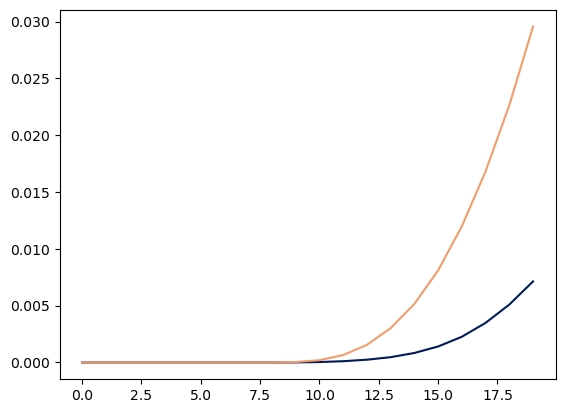

In [202]:
plt.plot(nan_conv_STEPS, c = 'C0')
plt.plot(nan_strat_STEPS,c = 'C4')